# Employee Attrition Prediction


This project was a part of IIT Guwahati's Summer Analytics program which concluded on June 25, 2020. Apart from learning a about Meachine Learning and some Deep Learning, I learnt about procrastination.

You see, I have been meaning to put up this project since a month. But as Mark Twain said -
    'Never put off till tomorrow what may be done day after tomorrow just as well.'
and I followed it.
Until today, when I wresteled myself to finalise this project. 

Well enought of digression and let's dive into the project.

The aim of this project is to predict Employee Attrition given some attributes (duh!). For the uninitiated, employee attrition is 'the natural process by which employees leave the workforce for example, through resignation for personal reasons or retirement and are not immediately replaced.'

#
Before looking into the data, I've imported some libraries, which will be helpful for the exploration.

## Importing Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None) #This displays all the columns instead of the default 20 

## Importing Dataset

# 
I have uploaded the train and test datasets on Github. The target variable is separated from the train set.

In [2]:
# train.csv contains the predictor variables and target variable, Attrition 
df = pd.read_csv('https://raw.githubusercontent.com/thepankj/IIT-G-Summer-Analytics-2020/master/train.csv').drop(['Attrition'], axis = 1)

df_test = pd.read_csv('https://raw.githubusercontent.com/thepankj/IIT-G-Summer-Analytics-2020/master/test.csv') #test.csv contains all the features except Attrition

target_var = pd.read_csv('https://raw.githubusercontent.com/thepankj/IIT-G-Summer-Analytics-2020/master/train.csv').Attrition

df.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4,1
1,2,36,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2,1
2,3,55,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5,1
3,4,39,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4,1
4,5,37,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1,1


# 
For the data preprocessing and feature engineering, I found it convinient to combine the train and the test datasets as df_combined, instead of processing them individually.

In [3]:
#combining the train and test datasets for preprocessing
df_combined = pd.concat([df, df_test], axis=0, sort = False, ignore_index = True)
df_combined.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4,1
1,2,36,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2,1
2,3,55,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5,1
3,4,39,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4,1
4,5,37,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1,1


## EDA

# 
Let's look at the datatypes of the various attributes.

In [4]:
(df_combined.dtypes).sort_values()

Id                          int64
YearsWithCurrManager        int64
YearsSinceLastPromotion     int64
YearsInCurrentRole          int64
YearsAtCompany              int64
TrainingTimesLastYear       int64
TotalWorkingYears           int64
StockOptionLevel            int64
PerformanceRating           int64
PercentSalaryHike           int64
NumCompaniesWorked          int64
MonthlyIncome               int64
CommunicationSkill          int64
Behaviour                   int64
JobInvolvement              int64
EnvironmentSatisfaction     int64
EmployeeNumber              int64
Education                   int64
DistanceFromHome            int64
Age                         int64
JobSatisfaction             int64
JobRole                    object
OverTime                   object
Gender                     object
EducationField             object
Department                 object
BusinessTravel             object
MaritalStatus              object
dtype: object

# 
We see that JobRole, Gender, OverTime, EducationField, Department, BusinessTravel, MaritalStatus are categorical variables. And the rest are numeric. It's better to One Hot Encode the categorical variables.

# 
Next, let's look at the number of unique values in each of the columns (attributes)

In [5]:
no_unique_values = df_combined.nunique().sort_values()
no_unique_values

Behaviour                     1
PerformanceRating             2
OverTime                      2
Gender                        2
MaritalStatus                 3
BusinessTravel                3
Department                    3
StockOptionLevel              4
EnvironmentSatisfaction       4
JobInvolvement                4
JobSatisfaction               4
CommunicationSkill            5
Education                     5
EducationField                6
TrainingTimesLastYear         7
JobRole                       9
NumCompaniesWorked           10
PercentSalaryHike            15
YearsSinceLastPromotion      16
YearsWithCurrManager         18
YearsInCurrentRole           19
DistanceFromHome             29
YearsAtCompany               37
TotalWorkingYears            40
Age                          43
MonthlyIncome              1349
EmployeeNumber             1470
Id                         1628
dtype: int64

# 
By looking at the above we can know that 'Behaviour' and 'Id' are redundant. Behaviour has a constant value and Id is, well just Id. So these two columns can be dropped.

In [6]:
df_combined.drop(['Behaviour', 'Id'], axis = 1, inplace = True)
df_combined.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
0,30,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4
1,36,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2
2,55,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5
3,39,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4
4,37,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1


# 
Next, inorder to check for missing values (if any), I plotted the Heatmap of null values.

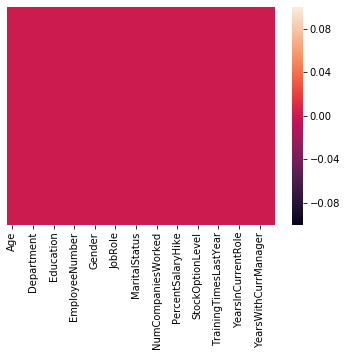

In [7]:
#This checks for missing values 
sns.heatmap(df_combined.isnull(), yticklabels=False);

## One Hot Encoding for the nominal variables

# 
The nominal variables, which are 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime' are One Hot Encoded.

In [8]:
nom_col_names = list(df_combined.select_dtypes('object').columns)
df_hot_enc = pd.get_dummies(df_combined, columns=nom_col_names, drop_first=True) #one hot encoding the nominal variables
df_hot_enc.head()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,30,2,3,571,3,3,4,2564,0,14,3,0,12,2,11,7,6,7,4,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,36,12,4,1614,3,3,3,4663,9,12,3,2,7,2,3,2,1,1,2,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
2,55,2,1,842,3,3,4,5160,4,16,3,0,12,3,9,7,7,3,5,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,39,24,1,2014,1,3,4,4108,7,13,3,0,18,2,7,7,1,7,4,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,37,3,3,689,3,3,3,9434,1,15,3,1,10,2,10,7,7,8,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0


## Scaling the variables

# 
Min max scalar or standard scalar

# 
Next the dataset is Standardized using MinMaxScalar 

In [9]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0, 1))
df_min_maxed = pd.DataFrame(scalar.fit_transform(df_hot_enc), columns=df_hot_enc.columns)
df_min_maxed.head()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.285714,0.035714,0.50,0.275762,0.666667,0.666667,1.000000,0.081885,0.000000,0.214286,0.0,0.000000,0.300,0.333333,0.275,0.388889,0.400000,0.411765,0.75,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.428571,0.392857,0.75,0.780358,0.666667,0.666667,0.666667,0.192417,1.000000,0.071429,0.0,0.666667,0.175,0.333333,0.075,0.111111,0.066667,0.058824,0.25,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.880952,0.035714,0.00,0.406870,0.666667,0.666667,1.000000,0.218589,0.444444,0.357143,0.0,0.000000,0.300,0.500000,0.225,0.388889,0.466667,0.176471,1.00,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.500000,0.821429,0.00,0.973875,0.000000,0.666667,1.000000,0.163191,0.777778,0.142857,0.0,0.000000,0.450,0.333333,0.175,0.388889,0.066667,0.411765,0.75,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.452381,0.071429,0.50,0.332850,0.666667,0.666667,0.666667,0.443655,0.111111,0.285714,0.0,0.333333,0.250,0.333333,0.250,0.388889,0.466667,0.470588,0.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Checking for skewness in the numerical data using graphs

# 
To check for skewness in the data and apply the required transformation, I plotted the graph of the original data along with Square Root transformed and Log Transformed

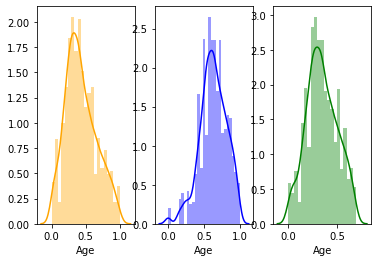

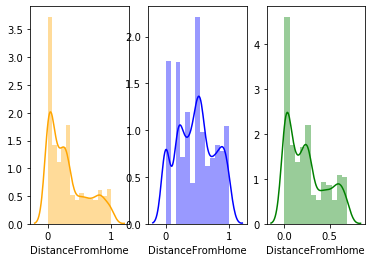

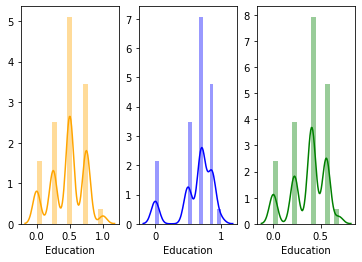

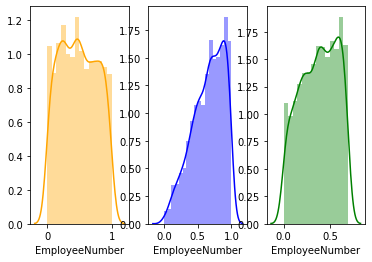

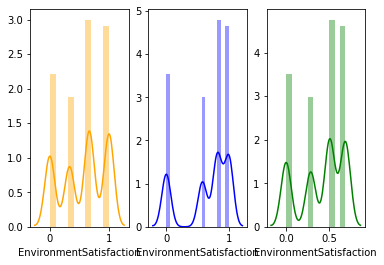

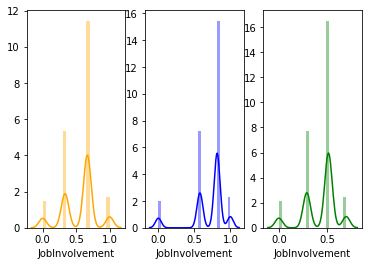

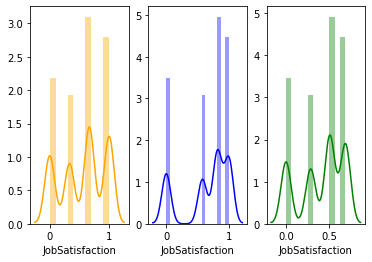

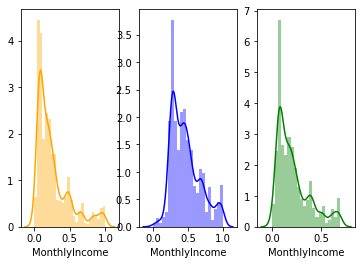

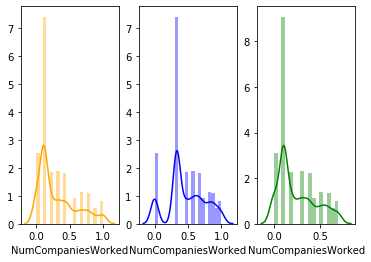

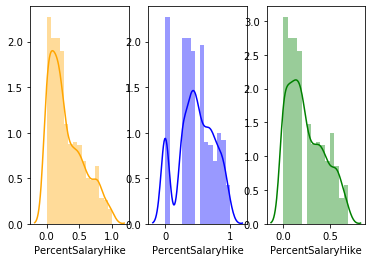

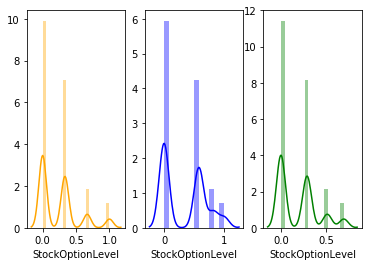

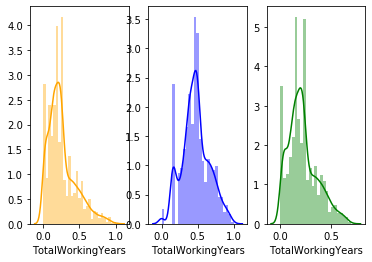

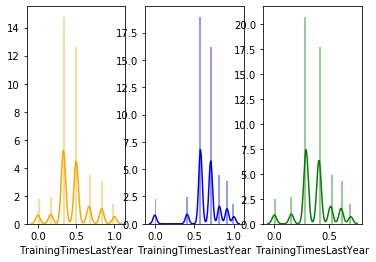

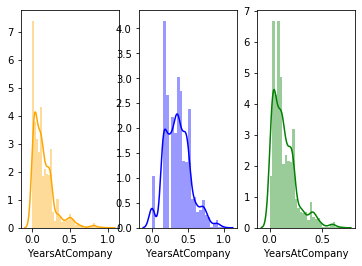

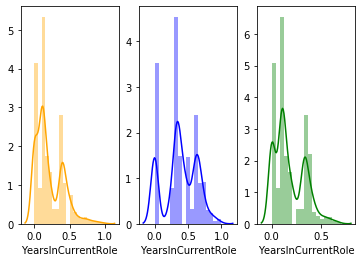

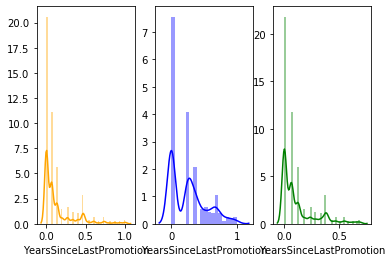

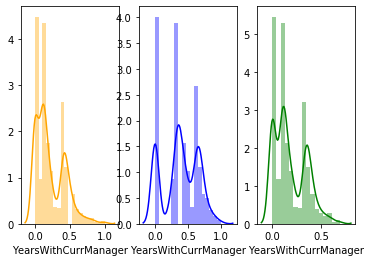

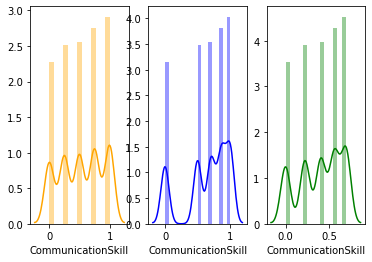

In [10]:
numr_col_list = list(df_combined.select_dtypes('int64').columns)
numr_col_list.remove('PerformanceRating')
for _ in numr_col_list:
    fig, ax = plt.subplots(1, 3)
    sns.distplot(df_min_maxed[_], ax = ax[0], color='orange')
    sns.distplot(np.sqrt(df_min_maxed[_]), ax = ax[1], color='blue')
    sns.distplot(np.log(df_min_maxed[_]+1), ax = ax[2], color='green')

# 
Looking at the graphs above, I decided to applt sqrt transformation to DistanceFromHome, StockOptionLevel, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWithCurrManager and log transformation to MonthlyIncome and NumCompaniesWorked.

In [11]:
#applying the necessary transformations to the needed columns
sqrt_cols = ['DistanceFromHome', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
             'YearsSinceLastPromotion', 'YearsWithCurrManager']
log_cols = ['MonthlyIncome', 'NumCompaniesWorked']

sqrt_transformed = df_min_maxed[sqrt_cols].apply(np.sqrt)
log_transformed = (df_min_maxed[log_cols]+1).apply(np.log)

# 
I replaced the columns with the transformed columns.

In [12]:
#Replacing the columns with the transformed columns
temp = df_min_maxed.drop(sqrt_cols+log_cols, axis = 1)
df_transformed = pd.concat([temp, sqrt_transformed, log_transformed], axis = 1)
df_transformed.head()

,Age,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PercentSalaryHike,PerformanceRating,TrainingTimesLastYear,CommunicationSkill,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,DistanceFromHome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome,NumCompaniesWorked
0,0.285714,0.50,0.275762,0.666667,0.666667,1.000000,0.214286,0.0,0.333333,0.75,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.188982,0.000000,0.547723,0.524404,0.623610,0.632456,0.641689,0.078705,0.000000
1,0.428571,0.75,0.780358,0.666667,0.666667,0.666667,0.071429,0.0,0.333333,0.25,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.626783,0.816497,0.418330,0.273861,0.333333,0.258199,0.242536,0.175982,0.693147
2,0.880952,0.00,0.406870,0.666667,0.666667,1.000000,0.357143,0.0,0.500000,1.00,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.188982,0.000000,0.547723,0.474342,0.623610,0.683130,0.420084,0.197693,0.367725
3,0.500000,0.00,0.973875,0.000000,0.666667,1.000000,0.142857,0.0,0.333333,0.75,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.906327,0.000000,0.670820,0.418330,0.623610,0.258199,0.641689,0.151167,0.575364
4,0.452381,0.50,0.332850,0.666667,0.666667,0.666667,0.285714,0.0,0.333333,0.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.267261,0.577350,0.500000,0.500000,0.623610,0.683130,0.685994,0.367178,0.105361


## Feature Selection

# 
Next is feature selection. I selected the 30 best features using SelectKBest with score_func as chi2 (chi squared).

In [13]:
#selecting 30 best features for the model
from sklearn.feature_selection import SelectKBest, chi2

Xk = df_transformed.iloc[0:1628, :]
yk = target_var

bestFeatures = SelectKBest(score_func=chi2, k = 30)
fit = bestFeatures.fit(Xk, yk)

scores = pd.DataFrame(fit.scores_, index=Xk.columns, columns=['Scores'])

best30 = scores.sort_values(['Scores'], ascending = False)[0:30]
print(best30)
best30_features = best30.index

df_preprocessed = df_transformed[best30_features]

                                       Scores
OverTime_Yes                       103.165751
JobRole_Sales Representative        63.118434
MaritalStatus_Single                52.902186
JobRole_Research Director           43.766311
BusinessTravel_Travel_Frequently    36.591459
StockOptionLevel                    32.573815
JobRole_Manufacturing Director      26.592961
JobRole_Manager                     24.360276
MaritalStatus_Married               23.616766
YearsWithCurrManager                20.382214
YearsInCurrentRole                  20.346399
Department_Sales                    18.425100
Department_Research & Development   13.320016
MonthlyIncome                       12.852722
JobRole_Laboratory Technician       12.035914
EducationField_Technical Degree     11.841846
YearsAtCompany                      10.613452
TotalWorkingYears                   10.409156
JobSatisfaction                      8.709688
EducationField_Marketing             8.139644
Age                               

# 
Finally the dataset is ready to be fed into a model.

In [14]:
#Finally the Pre-processed DataFrame is
X = df_preprocessed.iloc[:1628, :]
y = target_var
X_test = df_preprocessed.iloc[1628:, :]
X_test.index = range(470)

# 
I splitted the training dataset into train and validation sets. 

In [15]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=4)

# Logistic Regression

# 
The first model I tried is Logistic Regression. I used RandomizedSearchCV to get the best parameters. The accuracy score is around 77%.

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [17]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()
param_dist = {'C':list(range(1, 5)),
              'random_state':list(range(0,5)),
              'max_iter':[50, 100, 150, 200, 250]}
log_search = RandomizedSearchCV(logModel, param_distributions=param_dist, n_iter=50)
log_search.fit(X_train, y_train)

C:\Users\bugabo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\bugabo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bugabo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bugabo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bugabo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chang

C:\Users\bugabo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bugabo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bugabo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bugabo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bugabo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\bugabo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bugabo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bugabo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bugabo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bugabo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\bugabo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bugabo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bugabo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bugabo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bugabo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=50, n_jobs=None,
                   param_distributions={'C': [1, 2, 3, 4],
                                        'max_iter': [50, 100, 150, 200, 250],
                                        'random_state': [0, 1, 2, 3, 4]},
                   pre_dispatch='2*n_jobs', random_state

In [18]:
pred = log_search.predict(X_val)
accuracy_score(y_val, pred)

0.7713754646840149

# SVC

In [19]:
from sklearn.svm import SVC
svcModel = SVC(gamma="auto")
svcModel.fit(X_train, y_train)
pred = svcModel.predict(X_val)
accuracy_score(y_val, pred)

0.7527881040892194